# Identificación de sistemas por medio de la curva de reacción (respuesta al escalón).


En esta práctica vamos a obtener el modelo por curva de reacción y el modelo estático para un sistema térmico. También lo haremos para un motor DC considerando como salida la velocidad. Usaremos para ello las plantas diseñadas en la universidad denominadoss UNThermal y UNDCMotor.

+ El UNThermal es un minilaboratorio que permite realizar el control de temperatura de un par transistor-sensor mediante la administración precisa de potencia eléctrica controlada por una fuente de corriente analógica. 

+ El UNDCMotor es un minilaboratorio que permite realizar el control de velocidad y ángulo de giro de un motor DC.


## Configuración
---


### Instalación de las librerias unthermal y unmotor

Ejecutar esta celda solo para instalar por primera vez o actualizar la libreria. __Asegúrese de instalar  [Git](https://git-scm.com/download/win/ "Git").__

<div class="alert alert-block alert-danger">
⚠️ Ejecutar esta celda solo para instalar por primera vez o actualizar la libreria. 
</div>


In [ ]:
# import subprocess
# command = ["pip", "install", "-I","--user", "git+https://github.com/nebisman/UNThermal.git@main#subdirectory=code/python_code"]
# process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
# for line in process.stdout:
#     print(line.strip())

# command = ["pip", "install", "-I","--user","git+https://github.com/nebisman/UNDCMotor.git@main#subdirectory=code/python_code"]
# process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
# for line in process.stdout:
#     print(line.strip())

Cloning https://github.com/nebisman/UNThermal.git (to revision main) to /tmp/pip-req-build-7844mfv8
Running command git clone --filter=blob:none --quiet https://github.com/nebisman/UNThermal.git /tmp/pip-req-build-7844mfv8
Resolved https://github.com/nebisman/UNThermal.git to commit e475dfee8d137ee609c4cb22814d8a94c2c62e6c
Installing build dependencies: started
Installing build dependencies: finished with status 'done'
Getting requirements to build wheel: started
Getting requirements to build wheel: finished with status 'done'
Preparing metadata (pyproject.toml): started
Preparing metadata (pyproject.toml): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/549.6 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 262.1/549.6 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/8.6 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/8.6 MB ? eta -:-


### Importación de comandos de la libreria unthermal y unmotor

A continuación importamos los comandos básicos que usaremos de la libreria `unthermal` y la libreria `Matplotlib` para las figuras.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import unthermal as temp
import numpy as np
import unmotor as mot


---


### Definición del sistema en el IoT

Lo primero que necesitamos es definir el sistema y su conexión al IoT. Esto lo hacemos mediante el  comando

`ThermalSystemIoT(plant_number="xxxx", broker_address = "xx.xxx.xxx.xxx")`.

+ El parámetro `plant_number` es el identificador de la planta con que está trabajando. Por ejemplo `plant_number="PC-T-XX"`

+ El parámetro `broker_address` es la dirección IP del broker al cual se conecta la planta. Poner siempre ` broker_address = "192.168.1.100"` 

In [ ]:
sistema_termico = temp.ThermalSystemIoT(plant_number = "PC-T-XX" , broker_address = "192.168.1.100")

## Modelos estático y dinámico del sistema térmico
---

A continuación vamos a obtener tanto el modelo estático, como el modelo dinámico por respuesta al escalón del sistema térmico

### Modelo estático del sistema térmico

Es natural comenzar investigando el comportamiento estacionario de un sistema bajo
control. Esto se hace mediante una curva que muestra el valor en estado estacionario de la
salida (en este caso, la temperatura del par transistor-sensor) para diferentes valores de la variable de entrada (en este caso la potencia aplicada). A esta curva se le denomina Modelo Estático del Sistema.


El modelo estático se puede obtener experimentalmente de varias formas. *Una manera
es que el sistema esté en lazo cerrado con un controlador preajustado e ir ajustando diferentes valores de la referencia. Cuando la salida (en este caso la temperatura) alcanza el valor estacionario de referencia, se registra la señal de control que fue necesaria. Esto da un punto del modelo estático. Este procedimiento se repite para cubrir el rango completo de entradas.*



+ La  función `get_static_model(system)` nos permite obtener el modelo estático del UNThermal definido por la instancia del UNThermal creada con la función  `ThermalSystemIoT(.)`
+ La funcion `plt.savefig(.)` permite guardar la figura en en cualquier formato para su video informe
+ `plt.show` hace que su figura se guarde al guardar y cerrar el notebook.


*Note que la salida los valores de estado estacionario de la entrada y la salida quedan registrados en las variables `ue`, `ye`. También quedan guardados en el archivo `\experiment_files\DCmotor_static_gain_response.csv` presente en la carpeta en la que ejecuta este script.*


In [ ]:
ue, ye = temp.get_static_model(sistema_termico) 
plt.savefig("static_model.pdf", format="pdf", bbox_inches="tight") # la figura se guarda en el archivo que ud desee
plt.show() # esta linea es para que la figura se mantenga al guardar el notebook

### Preguntas orientadoras sobre el modelo estático

Por favor discuta las preguntas con su compañero inmediatamente durante la práctica y respondalas en su videoinforme 

1.  Considere que el rango de operación va desde  $40^oC$ hasta $100^oC$. ¿Existen temperaturas en este rango más dificiles de controlar, según el modelo estático?
2.  Suponga que un modelo aproximado del sistema térmico está dado por $G(s)=\frac{\alpha}{\tau\,s+1}$. ¿Cual de los parámetros ($\alpha$ o $\tau$) podriamos asumir como aproximadamente constante, según la curva del modelo estático?
3.  ¿Cual es la señal de control necesaria para controlar una temperatura cercana a $60^oC$ y cuanto nos queda de acción de control si tenemos que compensar una temperatura muy fria que actúa como perturbación?



### Modelo dinámico por respuesta al escalón

Cuando se realiza la linealización del modelo del UNThermal se obtiene un  modelo lineal de primer orden, tal y como puede revisar en este [documento](https://github.com/nebisman/UNDCMotor/blob/main/docs/modelo_matematico_unmotor.pdf).

Así, nuestro sistema térmico, dentro de una región cercana al punto de operación, puede ser descrito por la siguiente función de transferencia:

$$G(s)= \frac{\alpha}{\tau\, s + 1} \, e^{-L\,s}$$

Es usual que la primera prueba de identificación de sistemas que parecen de primer orden sea por la respuesta al escalón. 


### Método de estimación de los parámetros del sistema por la curva de reacción
 
 A continuación usamos el método de 2 puntos para la identificación del modelo de primer orden, según el prodedimiento descrito en este [documento](https://github.com/nebisman/UNThermal/blob/main/docs/metodo_2_puntos.pdf). 


 Para iniciar hacemos el experimento de respuesta al escalón, usando el comando `step_open`.

In [ ]:
# inicialmente hacemos el experimento de respuesta al escalón para 50 grados
temp.step_open(sistema_termico, yop=50, amplitude=10);

#### Paso 1

Encuentre $y_a$ gráficamente o como el promedio de $N$ puntos antes del cambio del escalón y $y_b$ como el promedio de los últimos $N$ puntos registrados en la respuesta al escalón. 

Establezca el valor de $u_a$ y $u_b$.

In [ ]:
# Paso 1
# Aqui leemos los resultados del experimento
t, u, y = temp.read_step_open_file('experiment_files/Thermal_step_open_exp.csv')
ind_step = np.diff(u).argmax() # es para detectar el indice del elemento donde ocurre el escalon


# este es el valor inicial del escalón antes del cambio
ua = u[ind_step]

# el último punto es el valor final del escalón
ub = u[-1]

# calculamos el valor inicial de temperatura antes del cambio en el escalón
# como el promedio de los 10 puntos antes del cambio
ya = np.mean(y[ind_step-10:ind_step+1])

# para el valor final de la temperatura tomamos un promedio de las 10 últimas valores
yb = np.mean(y[-10:]) 

# calculamos el cambio neto en el escalon
delta_u = ub - ua

# calculamos el cambio en el valor de estado estacionario de la salida
delta_y = yb - ya 


#### Paso 2

Con los datos experimentales, encuentre y grafique la respuesta experimental normalizada $\overline{y}(t)$ del sistema por medio de siguiente ecuación:

 $$\overline{y}(t) = \frac{y(t)-y_a}{\Delta\,y}$$

In [ ]:
# paso 2
# calculamos la respuesta normalizada
y_norm = (y - ya) / delta_y

#graficamos la respuesta normalizada
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title(r'Curva de respuesta normalizada $\overline{y}(t)$')
ax.set_facecolor('#f4eed7')
ax.plot(t,y_norm)
ax.grid(True)
ax.set_xlabel("Tiempo (s)")
plt.show()



#### Paso 3

Encuentre por medio de interpolación numérica de la curva experimental los valores de tiempo $t_1, t_2$ en los cuales la respuesta experimental normalizada $\overline{y}(t)$ alcanza dos valores en la zona inicial de máxima pendiente de la curva, en la cual $\overline{y}(t)\leq 0.5$.

Por ejemplo, $\overline{y}_1=0.05$ y $\overline{y}_2=0.3$.

In [ ]:
# Paso 3 
# Definimos los puntos y1n=0.1, y y2n=0.3 y encontramos los tiempos en que se producen por interpolación numérica
y1n = 0.05
y2n = 0.3
t1 = np.interp(y1n, y_norm, t) 
t2 = np.interp(y2n, y_norm, t) 

#graficamos estos puntos en la figura anterior para ilustrar
ax.scatter([t1, t2],[y1n,y2n],color='b')
ax.text( t1+10,y1n, f'$t_1=${t1:0.2f}  '+r'$\overline{y}_1$='+f'{y1n:0.2f}', fontsize=12, color='b')
ax.text( t2+10,y2n, f'$t_2=${t2:0.2f}  '+r'$\overline{y}_2$='+f'{y2n:0.2f}', fontsize=12, color='b')
plt.show()

#### Paso 4
Calcule $L$, $\tau$ y $\alpha$ usando las  siguientes ecuaciones:	

$$\tau= \frac{t_2-t_1}{\ln(\frac{1-\overline{y}_1}{1-\overline{y}_2})}$$

$$L = t_1 + \tau \ln (1-\overline{y}_1)$$

$$\alpha =  \frac{\Delta\,y}{\Delta_u}$$ 




In [ ]:
# Paso 4 calculamos los valores estimados de tao, L y alpha


tau = (t2-t1)/np.log((1-y1n)/(1-y2n))
L = np.max([0,t1 + tau * np.log(1-y1n)])
alpha = delta_y / delta_u

In [ ]:
def compute_step_response(t, alpha, tau, L):
    # esta función calcula la respuesta al escalon con los parametros
    ym = []
    for ti in t:
        yi = alpha * delta_u * (1 - np.exp(-np.max([0, ti-L]) / tau)) + ya
        ym.append(yi)
    return ym


# calculamos la respuesta del modelo
ymodel = compute_step_response(t, alpha, tau, L)

# ahora graficamos la salida comparar los resultados
fig, (ay, au) = plt.subplots(2, 1, figsize=(10, 6),height_ratios=[4, 1])
ay.plot(t, y, t, ymodel)
ay.grid(True)
ay.set_title('Temperatura')
ay.set_facecolor('#f4eed7')
ay.legend(["Datos", r"Modelo $G(s)= \frac{\alpha_m}{\tau_m\,s + 1} e^{-L\,s} = \frac{%0.3f }{%0.3f\,s+1}e^{-%0.2f\,s}$" %(alpha, tau, L)])


# En este gráfico está la entrada escalón
au.plot(t, u, label='% de potencia de entrada', color="#00aa00")
au.set_xlabel("Tiempo")
au.set_facecolor('#d7f4ee')
au.grid(True)
au.legend(["Porcentaje de potencia"])
plt.show()

#### Función completa para la identificación del modelo de primer orden 

Todos los pasos anteriores están sintetizados en la función `get_fomodel_step(system, yop = desired_op)`. Esta función, además, utiliza una estimación más precisa de las constantes usando 4 puntos y mínimos cuadrados.


+ El parámetro `system` es la instancia creada con la función  `ThermalSystemIoT(.)`

+ El parámetro `yop = desired_op` permite obtener la respuesta al escalón con un cambio de potencia que inicia exactamente en el punto de operación `yop`.

+  `alpha, tau` y `L` son los parámetros del sistema térmico.

En el ejemplo siguiente obtenemos la respuesta al escalón y el modelo para un punto de operación.


In [ ]:
#Ejemplo
alpha, tau, L = temp.get_fomodel_step(sistema_termico, yop = 50, amplitude=10, t1=600)

### Trabajo experimental con el sistema térmico

+ Obtenga modelos para el sistema térmico en los puntos de operación de $60^o$ y $80^o$ usando la función `get_fomodel_step`. 

#### Preguntas orientadoras sobre los modelos dinámicos

+ Compare  los modelos obtenidos  a $60^o$ y a  $80^o$ ¿Son similares los parámetros obtenidos en cada uno de estos modelos?

+ Consideremos el modelo estático y los dos modelos dinámicos. Discuta que diferencias podrían existir al controlar el sistema térmico en un punto de operación cercano a $60^o$ y en un punto cercano a $80^o$.

## Modelo estático y dinámico para el Motor DC
___

A continuación vamos a realizar el trabajo de un modelo estático y dinámico para el Motor DC. Para ello. primero definimos la planta como objeto IoT. Esto lo hacemos a continuación:

In [2]:
my_motor = mot.MotorSystemIoT(plant_number = "PC-M-14", broker_address = "192.168.1.100") 

### Modelo estático del Motor DC



El modelo estático se puede obtener experimentalmente de varias formas. *otra manera
habitual es ajustar un valor constante de entrada y medir la salida en estado estacionario.
Esto da un punto del modelo estático. Este procedimiento se repite para cubrir el
rango completo de entradas.*

+ La  función `get_static_model(m)` nos permite obtener el modelo estático del UNDCmotor definido por la instancia del UNDCMotor creada con la función  `MotorSystemIoT(.)`

+ La función `plt.savefig(.)` permite guardar la figura en en cualquier formato.

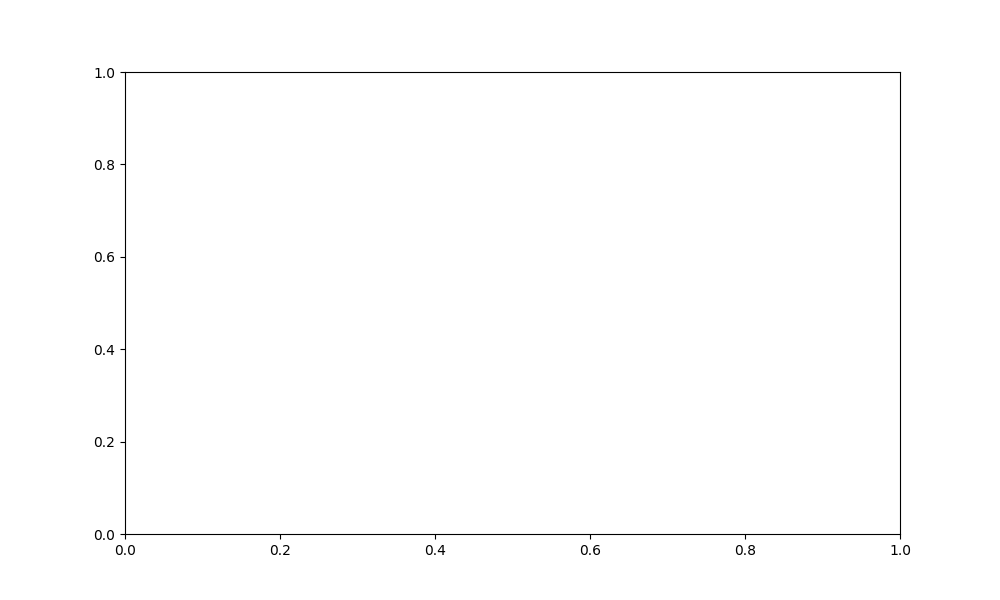

Connected successfully to MQTT Broker!
Subscribed:  1   (2,)
Static model esperiment has been completed


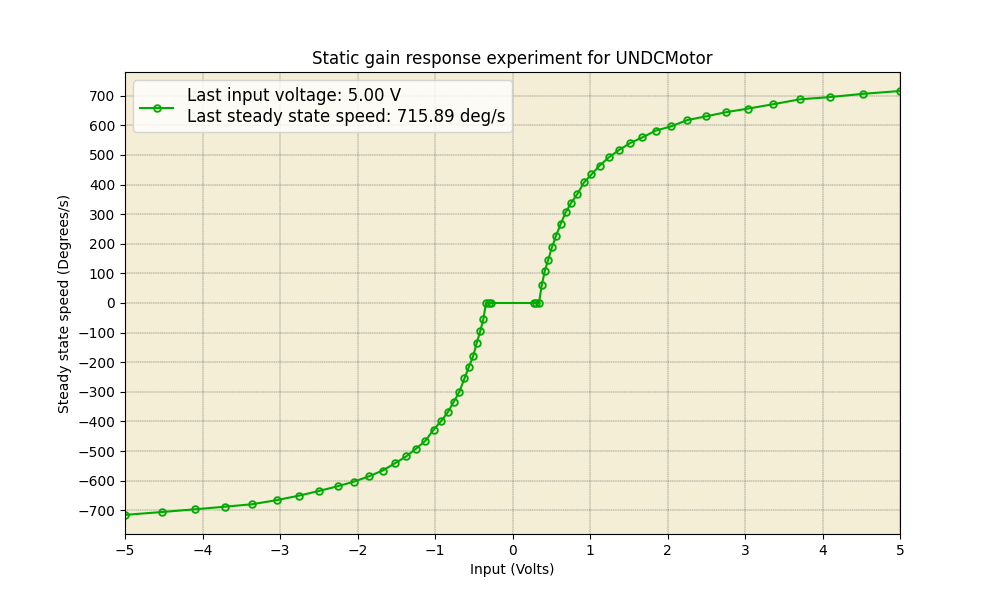

In [3]:
ue, ye = mot.get_static_model(my_motor) 
plt.savefig("static_model.pdf", format="pdf", bbox_inches="tight") # la figura se guarda en el archivo que ud desee
plt.show() # esta linea es para que la figura se mantenga al guardar el notebook

#### Preguntas orientadoras sobre el modelo estático

Discuta estas preguntas con su compañero e incluya una respuesta breve en su video informe.

1.  ¿Cuál es la zona muerta del motor?
2.  ¿Para cuales rangos de velocidad podría ser difícil controlar el motor?
3.  ¿Hasta que velocidad máxima se puede controlar el motor?
4.  Suponga que un modelo aproximado del motor está dado por $G(s)=\frac{\alpha}{\tau\,s+1}$. ¿Cual de los parámetros ($\alpha$ o $\tau$) varía ampliamente, según se ve reflejado en la  no linealidad  de la curva del modelo estático? 

### Modelo dinámico por respuesta al escalón 
---

Un motor DC puede ser descrito con muy buena aproximación por un  [modelo lineal de primer orden](https://github.com/nebisman/UNDCMotor/blob/main/docs/modelo_matematico_unmotor.pdf), si consideramos que la entrada es tensión y la salida es la velocidad angular.

Así, el UNDCMotor puede ser descrito por la siguiente función de transferencia:

$$G(s)= \frac{\alpha}{\tau\, s + 1} e^{-sL}$$

*Note que el retardo fundamentalmente aparece por el tiempo de muestreo del sistema digital que procesa la información.*



La función `get_fomodel_step(system, yop = desired_op)`  *(get first order model by using step response)* permite obtener la respuesta al escalón y el modelo matemático del UNDCMotor

+ El parámetro `system` es la instancia del UNDCMotor creada con la función  `MotorSystemIoT(.)`

+ El parámetro `yop = desired_op` permite obtener la respuesta al escalón con un cambio de tensión que centra, aproximadamente, los valores final e inicial del escalón en el punto de operación `yop`.

+  `alpha, tau` y `L` retornan los parámetros del motor.

En el ejemplo siguiente obtenemos la respuesta al escalón y el modelo para un punto de operación.

Connected successfully to MQTT Broker!
Subscribed:  62   (2,)


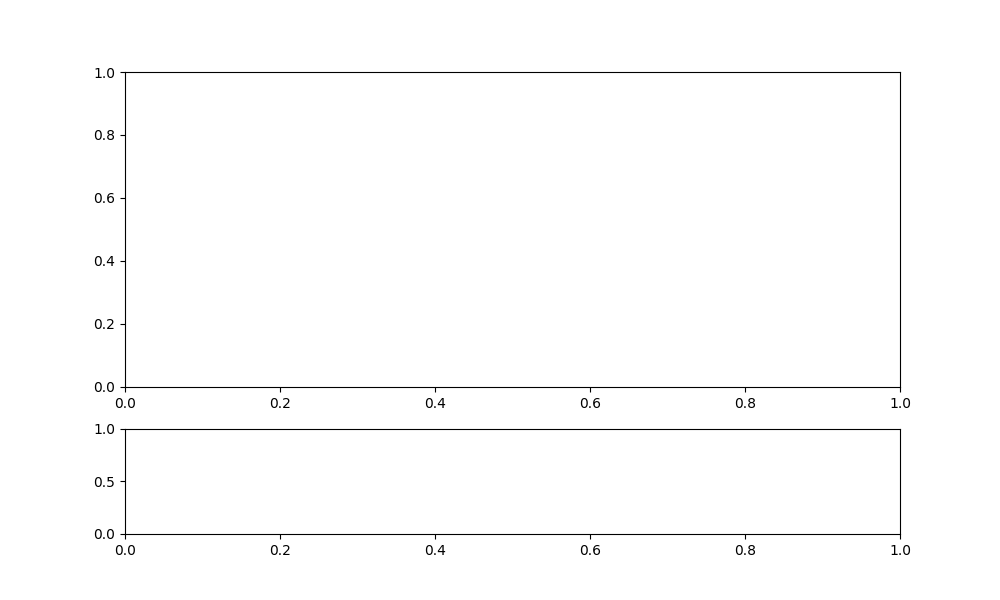

0.4653005 0.59591091
120.08572173799999 228.85715637399997


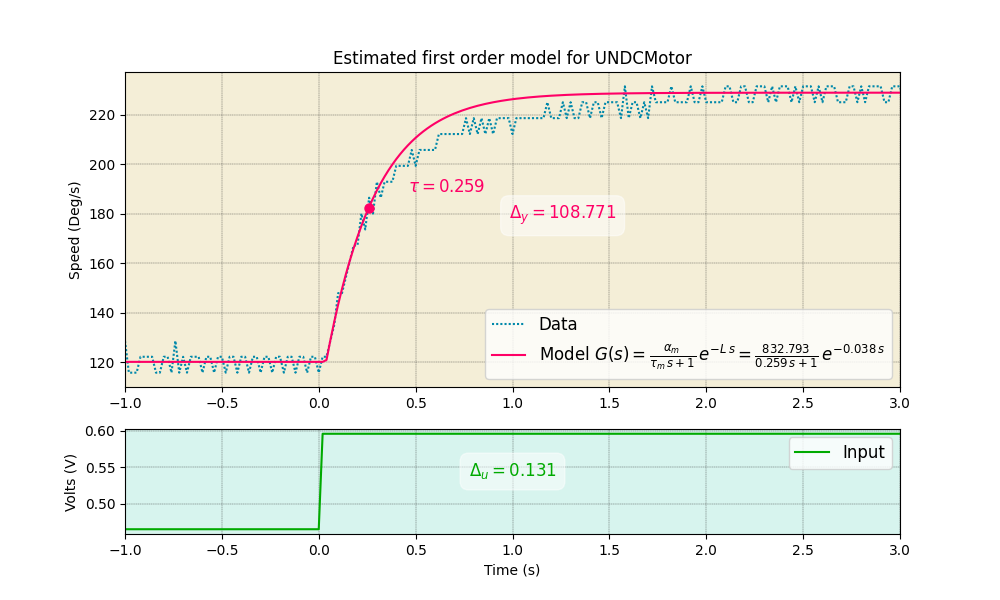

In [4]:
#Ejemplo
alpha, tau, L = mot.get_fomodel_step(my_motor, yop = 200)
plt.savefig("first_order_model_yop_150.pdf", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook


### Trabajo experimental con el motor

Encuentre los modelos dinámicos por respuesta al escalón para los siguientes puntos de operación:

+ $y_{OP}=150^o/s$
+ $y_{OP}=300^o/s$
+ $y_{OP}=600^o/s$

#### Preguntas sobre el modelo por respuesta al escalón

+ Describa como cambia la constante de tiempo $\tau$ al incrementar la velocidad.
+ Discuta que pasaría si se requiere un controlador para garantizar velocidad de $10^o/s$ en este sistema. 
+ Describa como cambia la constante de ganancia $\alpha$ al incrementar la velocidad.
+ Discuta sobre la incertidumbre en los parámetros $\alpha$ y $\tau$ del motor. ¿Qué implicaciones podría tener en control?
+ Compare la incertidumbre en los parámetros $\alpha$ y $\tau$ del motor con la incertidumbre que se observa para los mismos parámetros en el sistema térmico en diferentes puntos de operación. Discuta al respecto. 


Connected successfully to MQTT Broker!
Subscribed:  64   (2,)


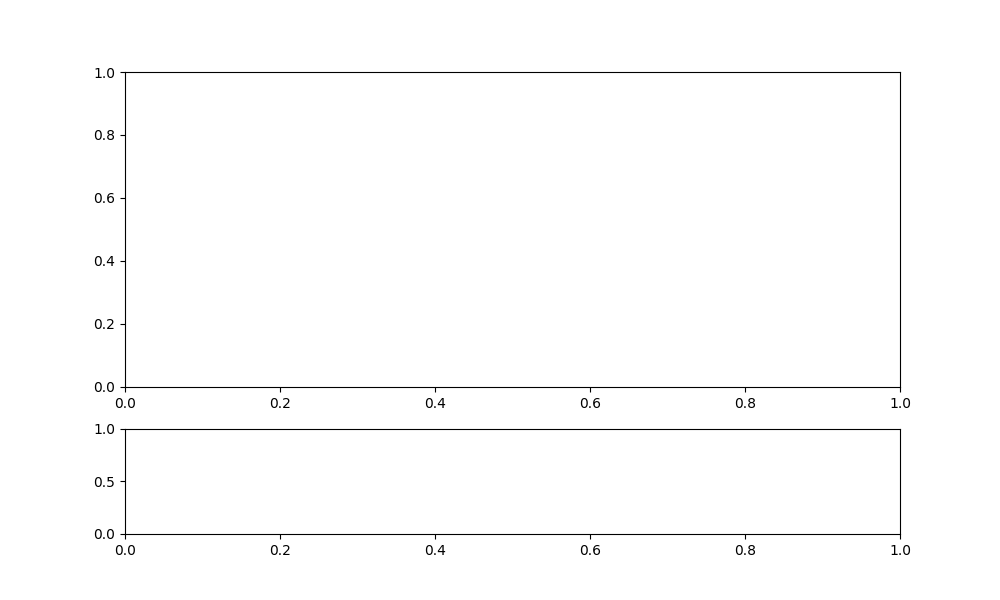

0.40919244 0.52419859
100.0285781888 195.42858582


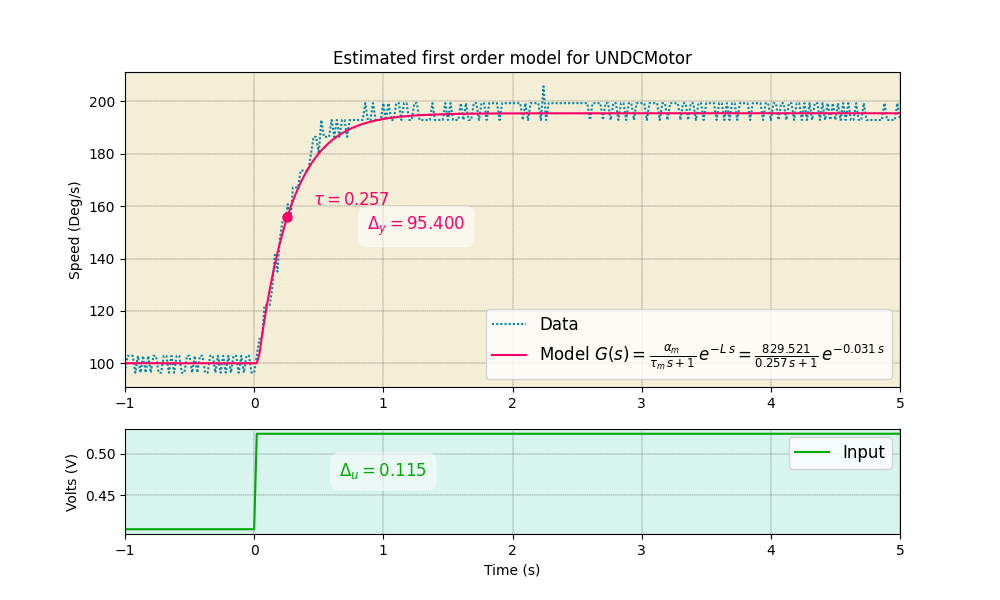

In [5]:
#Ejemplo
alpha, tau, L = mot.get_fomodel_step(my_motor, yop = 150)
plt.savefig("first_order_model_yop_150.pdf", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook

Connected successfully to MQTT Broker!
Subscribed:  66   (2,)


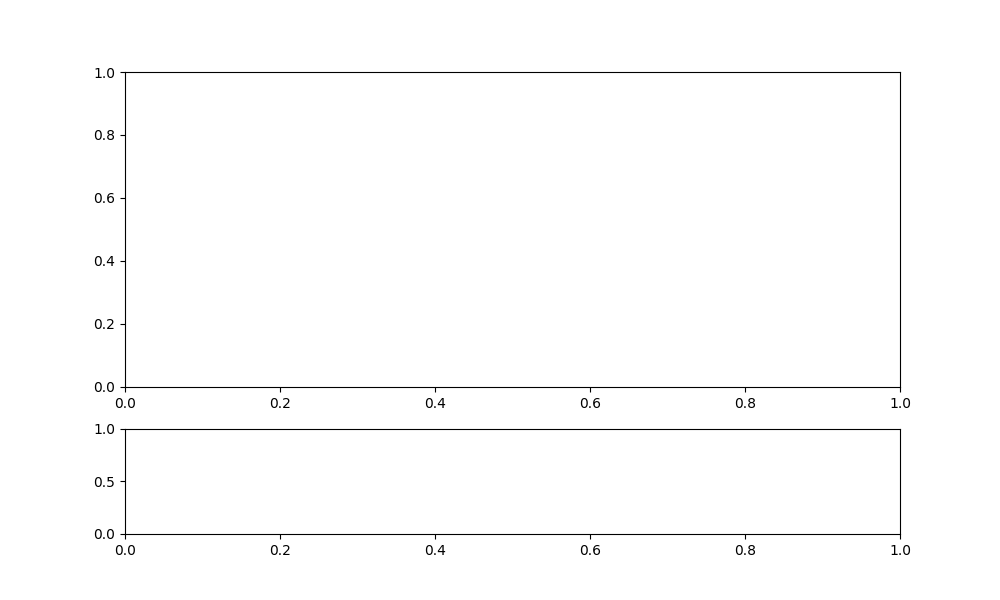

0.59591091 0.78826904
250.71430969000002 351.642874145


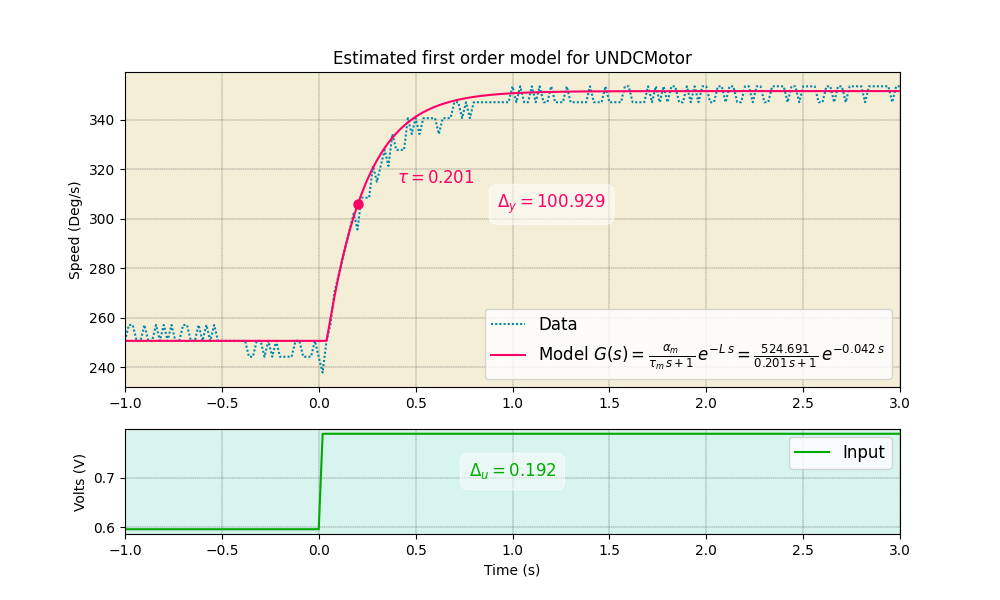

In [6]:
#Ejemplo
alpha, tau, L = mot.get_fomodel_step(my_motor, yop = 300)
plt.savefig("first_order_model_yop_150.pdf", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook

Connected successfully to MQTT Broker!
Subscribed:  68   (2,)


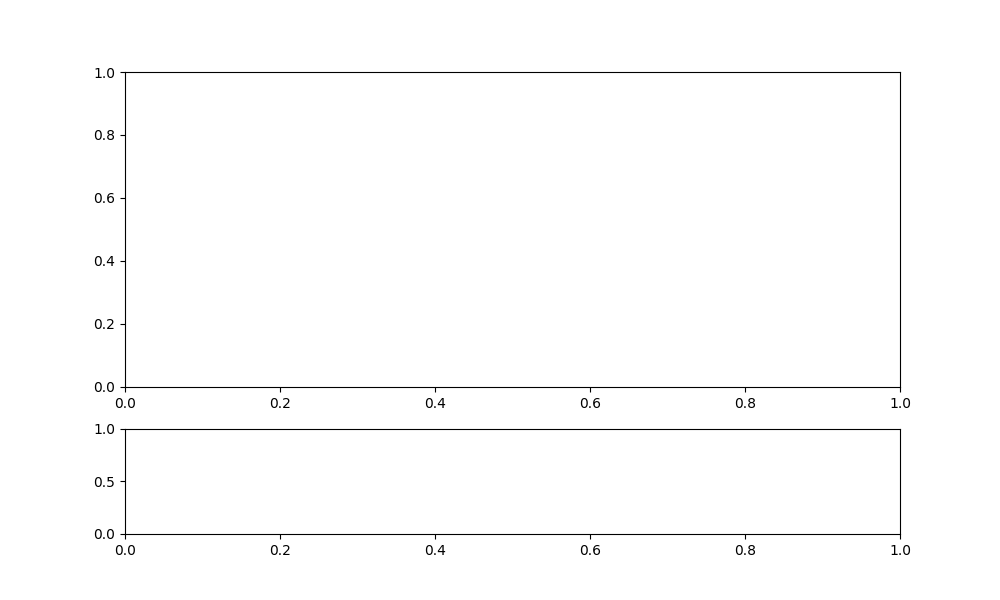

1.59681749 2.88520956
550.285742186 648.0000488259999


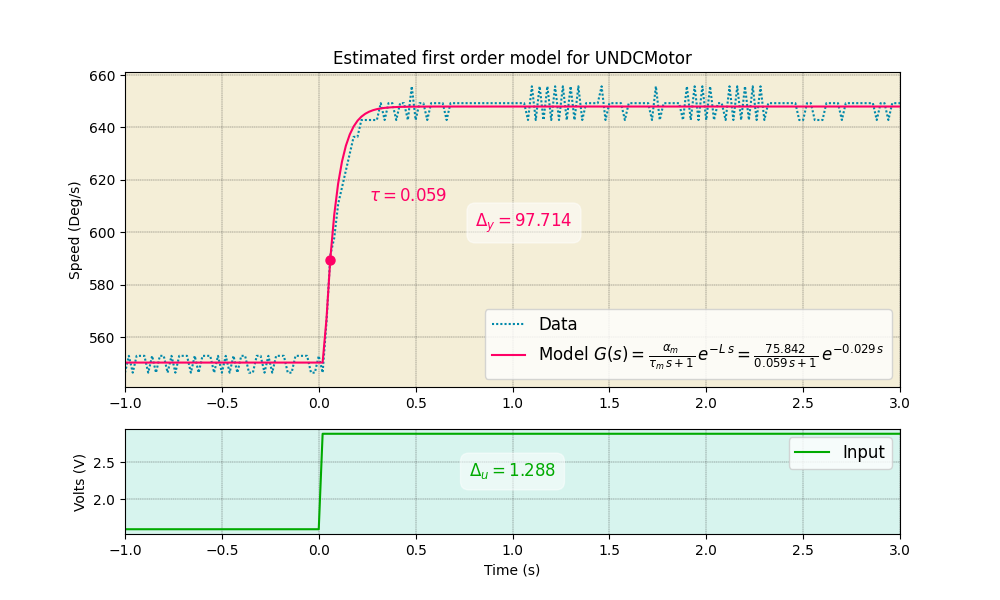

In [7]:
#Ejemplo
alpha, tau, L = mot.get_fomodel_step(my_motor, yop = 600)
plt.savefig("first_order_model_yop_150.pdf", format="png", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook